# Prepare robots first  
* run panda repeater on controller pc  

```
ssh panda@192.168.0.172
roslaunch panda_ros_repeater joint_velocity_repeater.launch robot_ip:=192.168.0.13 load_gripper:=false

```

* Keep indy connected to conty to bypass conty-connection delay bug

# initialize notebook

In [1]:
from __future__ import print_function
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; } </style>"))
import matplotlib.pyplot as plt

# Initialize constants

In [2]:
from pkg.marker_config import *
from pkg.tmp_framework import *
from pkg.constraint.constraint_action import *
from pkg.constraint.constraint_object import *
from pkg.constants import *
from pkg.utils.plot_utils import *
from pkg.utils.utils import *
from pkg.environment_builder import *
from pkg.ui.ui_broker import *
from pkg.controller.combined_robot import *

gtimer = GlobalTimer.instance()
gtimer.reset()

In [3]:
crob = CombinedRobot(connection_list=(False, False))
USE_CAM = True

connection_list
(False, False)


# initialize graph & ui

In [4]:
if "cam" not in locals():
    cam = StereoCamera.instance() if USE_CAM else None

# set urdf
xcustom, JOINT_NAMES, LINK_NAMES, urdf_content = reset_ghnd(crob.robots_on_scene, XYZ_RPY_ROBOTS_DEFAULT, crob.custom_limits, start_rviz=True)
ghnd = GeometryHandle(urdf_content)


graph = TMPFramework(ghnd=ghnd, urdf_path=URDF_PATH, joint_names=JOINT_NAMES, link_names=LINK_NAMES, 
                        urdf_content=urdf_content, combined_robot=crob)
graph.set_camera(cam)
graph.set_cam_robot_collision(_add_cam_poles=False, color=(1,1,1,0))
graph.set_rviz()

# start UI
ui_broker = UIBroker.instance()
ui_broker.initialize(graph)
ui_broker.start_server()

# set rviz
graph.set_rviz(crob.home_pose)
ui_broker.set_tables()

Start streaming
Device configuration: 
	color_format: 3 
	(0:JPG, 1:NV12, 2:YUY2, 3:BGRA32)

	color_resolution: 5 
	(0:OFF, 1:720p, 2:1080p, 3:1440p, 4:1536p, 5:2160p, 6:3072p)

	depth_mode: 3 
	(0:OFF, 1:NFOV_2X2BINNED, 2:NFOV_UNBINNED,3:WFOV_2X2BINNED, 4:WFOV_UNBINNED, 5:Passive IR)

	camera_fps: 2 
	(0:5 FPS, 1:15 FPS, 2:30 FPS)

	synchronized_images_only: False 
	(True of False). Drop images if the color and depth are not synchronized

	depth_delay_off_color_usec: 0 ms. 
	Delay between the color image and the depth image

	wired_sync_mode: 0
	(0:Standalone mode, 1:Master mode, 2:Subordinate mode)

	subordinate_delay_off_master_usec: 0 ms.
	The external synchronization timing.

	disable_streaming_indicator: False 
	(True or False). Streaming indicator automatically turns on when the color or depth camera's are in use.


Unable to register with master node [http://localhost:11311]: master may not be running yet. Will keep trying.


Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran0']/actuator[@name='indy0_motor0']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran1']/actuator[@name='indy0_motor1']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran2']/actuator[@name='indy0_motor2']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran3']/actuator[@name='indy0_motor3']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran4']/actuator[@name='indy0_motor4']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran5']/actuator[@name='indy0_motor5']


Please create a subscriber to the marker
publication OK
published: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Please create a subscriber to the marker
Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "pkg.ui.dash_launcher" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


# Calibrate camera

In [5]:
if USE_CAM:
    cam.calibrate(ghnd)
    graph.set_cam_robot_collision()
    graph.set_rviz()

# Update Robots

In [6]:
if USE_CAM:
    # btn: detect robots
    crob.detect_robots(cam)

    # btn: apply
    xcustom, JOINT_NAMES, LINK_NAMES, urdf_content = reset_ghnd(crob.robots_on_scene, crob.xyz_rpy_robots, crob.custom_limits, start_rviz=True)
    ghnd = GeometryHandle(urdf_content)


    graph.clear_markers()
    graph.clear_highlight()
    graph.ghnd.clear()
    timer.sleep(1)
    graph.__init__(ghnd=ghnd, urdf_path=URDF_PATH, joint_names=JOINT_NAMES, link_names=LINK_NAMES, 
                       urdf_content=urdf_content, combined_robot=crob)
    add_geometry_items(graph.urdf_content, ghnd, color=(0, 1, 0, 0.3), display=True, collision=True,
                       exclude_link=["panda1_link7"])
    graph.set_cam_robot_collision()
    graph.set_rviz()

Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran0']/actuator[@name='indy0_motor0']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran1']/actuator[@name='indy0_motor1']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran2']/actuator[@name='indy0_motor2']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran3']/actuator[@name='indy0_motor3']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran4']/actuator[@name='indy0_motor4']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran5']/actuator[@name='indy0_motor5']


Please create a subscriber to the marker


## add sponge

In [7]:
sponge = ghnd.create_safe(name="sponge", gtype=GEOTYPE.BOX, link_name="indy0_tcp",
                          dims=(0.07, 0.07, 0.07), center=(0, 0, 0.14), rpy=(0, 0, 0), collision=True, display=True,
                          color=(1,1,1,1)
                         )
graph.add_marker(sponge)

# Detect environment

In [8]:
env_gen_dict, objectPose_dict, corner_dict, color_image, rs_objectPose_dict, rs_corner_dict, rs_image = cam.detect_environment(ghnd)
add_objects_gen(graph, env_gen_dict)
graph.set_rviz()

## make track

In [9]:
track = ghnd.NAME_DICT['track']
track_plane = ghnd.copy_from(track, new_name='track_plane')
T_new = np.matmul(track.Toff, SE3(np.identity(3), (0,0,track.dims[2]/2)))
track_plane.set_offset_tf(center=tuple(T_new[:3,3]), orientation_mat=T_new[:3,:3])
track_plane.color = (0,1,0,0.3)
track_plane.set_dims((track.dims[0], track.dims[1], 0.001))
graph.add_marker(track_plane)
track_wall_a = ghnd.copy_from(track, new_name='track_wall_a')
T_wall_a = np.matmul(track.Toff, SE3(Rot_zyx(-np.pi/2,0,np.pi/2), (0,track.dims[1]/2+0.12,0)))
track_wall_a.set_offset_tf(center=tuple(T_wall_a[:3,3]), orientation_mat=T_wall_a[:3,:3])
track_wall_a.color = (1,1,1,0.3)
track_wall_a.set_dims((0.2, 0.2, track.dims[0]))
graph.add_marker(track_wall_a)
track_wall_b = ghnd.copy_from(track, new_name='track_wall_b')
T_wall_b = np.matmul(track.Toff, SE3(Rot_zyx(-np.pi/2,0,np.pi/2), (0,-track.dims[1]/2-0.12,0)))
track_wall_b.set_offset_tf(center=tuple(T_wall_b[:3,3]), orientation_mat=T_wall_b[:3,:3])
track_wall_b.color = (1,1,1,0.3)
track_wall_b.set_dims((0.2, 0.2, track.dims[0]))
graph.add_marker(track_wall_b)

## Register binders

In [10]:
graph.register_binder(name='grip1', _type=Gripper2Tool, point=[0,0,0.112], rpy=[-np.pi/2,0,0], link_name="panda1_hand")
graph.register_binder(name='grip0', _type=Gripper2Tool, point=[0,0,0.14], rpy=[-np.pi/2,0,0], link_name="indy0_tcp")
graph.register_binder(name='floor', _type=PlacePlane)

## detect movable

In [11]:
BINDER_DICT = {'goal_bd': dict(_type=PlacePlane, object_name="goal", point=[0,0,0.02], rpy=[0,0,0])}
OBJECT_DICT = {'box1': dict(_type=BoxAction, hexahedral=True),
               'box2': dict(_type=BoxAction, hexahedral=True)}

In [12]:
objectPose_dict_mv, corner_dict_mv, color_image, aruco_map_mv = detect_objects(graph.cam.aruco_map, graph.cam.dictionary, graph.cam.ref_tuple)
put_point_dict = graph.register_object_gen(objectPose_dict_mv, BINDER_DICT, OBJECT_DICT, link_name="base_link")
graph.set_rviz()

In [13]:
graph.show_pose(graph.get_real_robot_pose())

In [14]:
from pkg.planner.moveit import moveit_py
from pkg.planner.moveit.moveit_planner import MoveitPlanner

### Set Planner

In [15]:
mplan = MoveitPlanner(
    joint_names=graph.joint_names, link_names=graph.link_names, urdf_path=graph.urdf_path, urdf_content=graph.urdf_content, 
    robot_names=crob.robot_names, ghnd=ghnd)
graph.set_planner(mplan)

### define constants

In [16]:
GROUP_NAME, TOOL_LINK, BASE_LINK  = "indy0", "indy0_tcp", "base_link"
TOOL_XYZRPY = ((0,0,0.18),(np.pi,0,0))
TOOL_XYZRPY2 = ((0,0,0.18),(-np.pi/2,0,0))
# TOOL_XYZRPY = ((0,0,0),(0,0,0))
# ORIGIN_XYZRPY = ((0,0,0.4), (0,0,0))
ORIGIN_XYZRPY = (track_plane.center, track_plane.rpy)

TOOL_TF = T_xyzrpy(TOOL_XYZRPY)
TOOL_XYZQUAT = T2xyzquat(TOOL_TF)
TOOL_TF2 = T_xyzrpy(TOOL_XYZRPY2)
TOOL_XYZQUAT2 = T2xyzquat(TOOL_TF2)
ORIGIN_TF = T_xyzrpy(ORIGIN_XYZRPY)

graph.add_marker(ghnd.create_safe(gtype=GEOTYPE.SPHERE, name="tool", link_name="indy0_tcp",
                                      center=TOOL_XYZRPY[0], rpy=(0,0,0), 
                                      dims=(0.02,0.02,0.02), color=(1, 0, 0, 0.7),
                                      collision=False))

mtem_list=[]

# Track plane Test

### check starting pose

In [95]:
Q_init = crob.home_pose
start_pose = T2xyzquat(np.matmul(np.matmul(ORIGIN_TF,SE3(Rot_rpy((0,0,-np.pi/2)),[0.3,0.0,0.0])), TOOL_TF))
trajectory_s, success = mplan.planner.plan_py(robot_name=GROUP_NAME, tool_link=TOOL_LINK, goal_pose=start_pose[0]+start_pose[1], goal_link=BASE_LINK, 
                                            Q_init=Q_init, plannerconfig="RRTConnectkConfigDefault", timeout=1)
Q_ready = trajectory_s[-1]
print("start_pose: {}".format(start_pose))
print("Q_ready: {}".format(np.round(Q_ready,2)))

start_pose: ([-0.635639488697052, -0.1970038264989853, 0.19841675460338593], [0.7083822171195722, 0.7058264213082457, -0.001770307140718424, 0.0007506427790863285])
Q_ready: [ 0.09 -0.53 -1.95 -0.   -0.66  0.09  0.   -0.39  0.   -1.57  0.    1.57
  1.57]


In [96]:
graph.show_motion(trajectory_s)
graph.show_pose(trajectory_s[-1])

### check goal pose

In [33]:
Q_init = crob.home_pose
goal_pose = T2xyzquat(np.matmul(np.matmul(ORIGIN_TF,SE3(Rot_rpy((0,0,-np.pi/2)),[-0.2,0.0,0])), TOOL_TF)) # after meet
trajectory, success = mplan.planner.plan_py(robot_name=GROUP_NAME, tool_link=TOOL_LINK, goal_pose=goal_pose[0]+goal_pose[1], goal_link=BASE_LINK, 
                                            Q_init=Q_ready, plannerconfig="RRTConnectkConfigDefault", timeout=1)
Q_last_ex = trajectory[-1]
print("Q_last_ex: {}".format(Q_last_ex))
print("goal_pose: {}".format(goal_pose))

Q_last_ex: [ 0.98192662 -0.68753862 -1.6166688  -0.01435607 -0.83010965  0.99588924
  0.         -0.39269908  0.         -1.57079633  0.          1.57079633
  1.57079633]
goal_pose: ([-0.13564324378967285, -0.198812335729599, 0.19769896566867828], [0.7083822171195722, 0.7058264213082457, -0.001770307140718424, 0.0007506427790863285])


In [34]:
graph.show_motion(trajectory)
graph.show_pose(trajectory[-1])

## apply collisions

In [49]:
mplan.update(graph)

### set manifolds

In [50]:
mplan.planner.clear_context_cache()
mplan.planner.clear_manifolds()

ctem_list = make_constraint_list([ghnd.NAME_DICT["track_plane"]])
mplan.planner.add_union_manifold_py(group_name=GROUP_NAME, tool_link=TOOL_LINK, tool_offset=TOOL_XYZQUAT[0]+TOOL_XYZQUAT[1], 
                                    geometry_list=ctem_list, fix_surface=True, fix_normal=False, tol=2e-3)

ctem_list_vert = make_constraint_list([ghnd.NAME_DICT["track_plane"]])
mplan.planner.add_union_manifold_py(group_name=GROUP_NAME, tool_link=TOOL_LINK, tool_offset=TOOL_XYZQUAT[0]+TOOL_XYZQUAT[1], 
                                    geometry_list=ctem_list_vert, fix_surface=False, fix_normal=True, tol=5e-3)

htem_list = make_constraint_list([ghnd.NAME_DICT["track_wall_a"]])
mplan.planner.add_union_manifold_py(group_name=GROUP_NAME, tool_link=TOOL_LINK, tool_offset=TOOL_XYZQUAT2[0]+TOOL_XYZQUAT2[1], 
                                    geometry_list=htem_list, fix_surface=False, fix_normal=True, tol=5e-3)

### search plan

In [51]:
trajectory_rough, success = mplan.planner.plan_constrained_py(GROUP_NAME,TOOL_LINK, goal_pose[0]+goal_pose[1], BASE_LINK, Q_ready, timeout=60)
print('result: {} ({})'.format(success, len(trajectory_rough)))

result: True (81)


In [52]:
graph.show_motion(trajectory_rough, period=0.01)

In [98]:
trajectory_s, trajectory_vel = apply_vel_acc_lims(trajectory_s, DT=1/4e3, urdf_content=urdf_content, joint_names = graph.joint_names, vel_scale=0.5, acc_scale=0.005)

In [99]:
trajectory, trajectory_vel = apply_vel_acc_lims(trajectory_rough, DT=1/4e3, urdf_content=urdf_content, joint_names = graph.joint_names, vel_scale=0.5, acc_scale=0.005)

In [113]:
graph.show_pose(trajectory_s[0])

In [114]:
gtimer.reset()

In [115]:
gtimer.tic("start")
graph.show_motion(trajectory_s[::320], period=0.02)
gtimer.toc("start")
time.sleep(1)
gtimer.tic("test")
graph.show_motion(trajectory[::160], period=0.02)
gtimer.toc("test")

3631.0479640960693

button clicked
button clicked
button action donebutton action done



In [108]:
print(gtimer)

start: 	1229.0 ms/1 = 1228.695 ms (1228.695/1228.695)
test: 	3556.0 ms/1 = 3556.093 ms (3556.093/3556.093)



In [71]:
len(trajectory)

13857

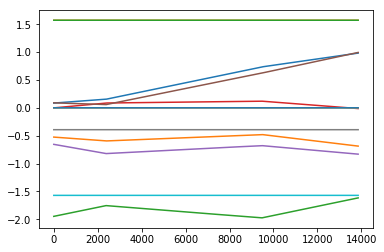

In [72]:
plt.plot(trajectory)

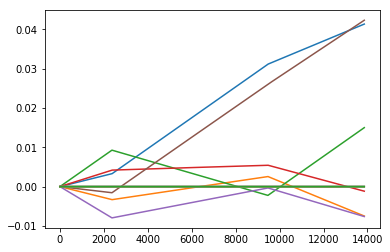

In [73]:
plt.plot(trajectory_vel)

## Execute motion

In [74]:
# prepare indy
indy = indytraj_client(server_ip="192.168.0.63", robot_name="NRMK-Indy7")

In [81]:
trajectory_indy = trajectory[:,:6]

indy.connect_and(indy.go_home)
indy.connect_and(indy.wait_for_move_finish)

Connect: Server IP (192.168.0.63)
Connect: Server IP (192.168.0.63)
Move finished!


True

In [82]:
indy.connect_and(indy.joint_move_to, np.rad2deg(trajectory_indy[0]))

Connect: Server IP (192.168.0.63)


In [77]:
time.sleep(5)

In [83]:
# Options
traj_type = 1  # 1 for joint move, 2 for task move
traj_freq = 4000  # control rate
dat_size = 6  # DOF

# make_trajectory
trajectory_d = differentiate(trajectory_indy, 1./traj_freq)
trajectory_dd = differentiate(trajectory_indy, 1./traj_freq)
traj_data = np.concatenate([trajectory_indy, trajectory_d, trajectory_dd], axis=-1).flatten()
indy.connect_and(indy.move_ext_traj_txt, traj_type, traj_freq, dat_size, traj_data)

Connect: Server IP (192.168.0.63)
